---

# *Visualizing Earnings Based On College Majors*

***

** Dataset Description ** :
We'll be working with a dataset on the job outcomes of students who graduated from college between 2010 and 2012. The original data on job outcomes was released by American Community Survey, which conducts surveys and aggregates the data. FiveThirtyEight cleaned the dataset and released it on their [Github repo.](https://github.com/fivethirtyeight/data/tree/master/college-majors)

** Attribute description ** :
Each row in the dataset represents a different major in college and contains information on gender diversity, employment rates, median salaries, and more. Here are some of the columns in the dataset:

|Row|Description|
|---|-----------|
|`Rank`|Rank by median earnings (the dataset is ordered by this column)|
|`Major_code`|Major code|
|`Major`|Major description.|
|`Major_category`|Category of major.|
|`Total`|Total number of people with major.|
|`Sample_size`|Sample size (unweighted) of full-time.|
|`Men`|Male graduates.|
|`Women`|Female graduates.|
|`ShareWomen`|Women as share of total.|
|`Employed`|Number employed.|
|`Median`|Median salary of full-time, year-round workers.|
|`Low_wage_jobs`|Number in low-wage service jobs.|
|`Full_time`|Number employed 35 hours or more.|
|`Part_time`|Number employed less than 35 hours.|

## Aim :
1. Using *'scatter plots'* we aim to determine : ** Do students in more popular majors make more money? **
2. Using *'histograms'* we aim to determine : ** How many majors are predominantly male or female?**
3. Using *'bar plots'* we aim to determine : ** Which category of majors have the most students?
 **

___

## Dataset cleaning :
Let's clean the dataset before performing any analysis so that we can extract clean and precise inferences from our dataset inspection.

In [370]:
# importing the required libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# in order to display the plot inline
%matplotlib inline              

In [371]:
# reading and importing the dataset into a onadas dataframe:
recent_grads = pd.read_csv('recent-grads.csv')
recent_grads.iloc[0]

Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                    2339
Men                                      2057
Women                                     282
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object

In [372]:
# Let's see how the data is structured :
recent_grads.head(5)

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [373]:
# Let's get the summary of all the numeric columns in the dataset:
recent_grads.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4549.750000,2177.500000,1778.250000,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15104.000000,5434.000000,8386.500000,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38909.750000,14631.000000,22553.750000,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


In [374]:
# Let's get some info about the datatypes too :
recent_grads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 21 columns):
Rank                    173 non-null int64
Major_code              173 non-null int64
Major                   173 non-null object
Total                   172 non-null float64
Men                     172 non-null float64
Women                   172 non-null float64
Major_category          173 non-null object
ShareWomen              172 non-null float64
Sample_size             173 non-null int64
Employed                173 non-null int64
Full_time               173 non-null int64
Part_time               173 non-null int64
Full_time_year_round    173 non-null int64
Unemployed              173 non-null int64
Unemployment_rate       173 non-null float64
Median                  173 non-null int64
P25th                   173 non-null int64
P75th                   173 non-null int64
College_jobs            173 non-null int64
Non_college_jobs        173 non-null int64
Low_wage_jobs          

*We will drop all the rows with missing values. Matplotlib expects that columns of values we pass in have matching lengths and missing values will cause matplotlib to throw errors. *

In [375]:
# let's find all the missing values in the dataset:
raw_data_count = recent_grads.shape[0]

recent_grads.dropna(inplace = True)

cleaned_data_count = recent_grads.shape[0]

print ("The number of rows containing empty values were : {}" .format(raw_data_count-cleaned_data_count))

The number of rows containing empty values were : 1


*We found that there was only one row containing empty values and that was dropped. Now that the dataset is cleaned let's try to find some relations betweeen the various attributes of our dataset.*

---

### 1. Using *scatterplots* to find the correlation between dataset attributes:

The correlation value between the attibutes are : 0.9644061612735608


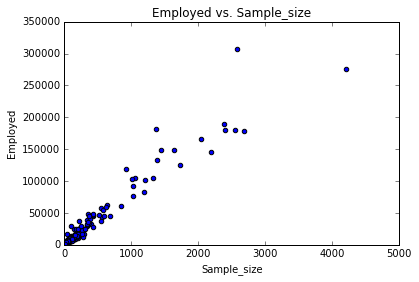

In [376]:
# 1. between 'sample_size' and 'employed':
recent_grads.plot(x='Sample_size' ,y= 'Employed',
                 kind = 'scatter',
                 title = 'Employed vs. Sample_size',
                  xlim = (0),
                  ylim = (0)
                 )
print("The correlation value between the attibutes are : {}".
      format(recent_grads['Sample_size'].corr(recent_grads['Employed'])))

*We see a strong positive correlation between the attributes.*

The correlation value between the attibutes are : -0.06447499542762185


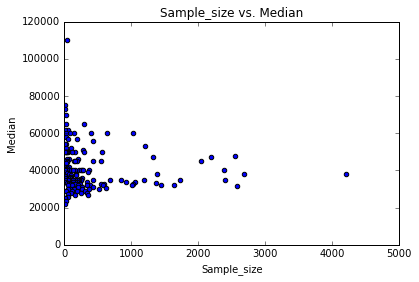

In [377]:
# 2. between 'sample_size' and 'median':
recent_grads.plot(x= 'Sample_size', y= 'Median',
                 kind = 'scatter',
                 title = 'Sample_size vs. Median',
                  xlim = 0,
                  ylim = 0
                 )
print("The correlation value between the attibutes are : {}"
      .format(recent_grads['Sample_size'].corr(recent_grads['Median'])))


*Hence, we see a negative realtion between sample_size and median values in the dataset.*

The correlation value between the attibutes are : -0.07903093567520722


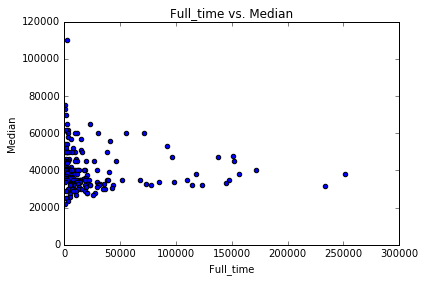

In [378]:
# 3. Between 'Full_time' and 'Median':
recent_grads.plot(x= 'Full_time', y= 'Median',
                 kind = 'scatter',
                 title = 'Full_time vs. Median',
                  xlim = 0,
                  ylim = 0
                 )
print("The correlation value between the attibutes are : {}".
      format(recent_grads['Full_time'].corr(recent_grads['Median'])))


*We see a negative realtion between Full_time and median values in the dataset.*

The correlation value between the attibutes are : 0.0732045786722932


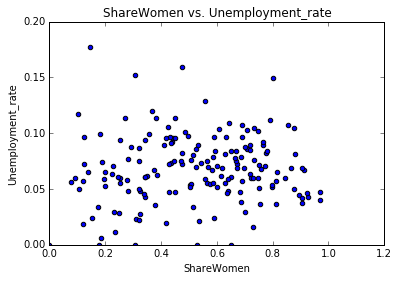

In [379]:
# 3. Between 'ShareWomen' and 'Unemployment_rate':
recent_grads.plot(x= 'ShareWomen', y= 'Unemployment_rate',
                 kind = 'scatter',
                 title = 'ShareWomen vs. Unemployment_rate',
                  xlim = 0,
                  ylim = 0
                 )
print("The correlation value between the attibutes are : {}".
      format(recent_grads['ShareWomen'].corr(recent_grads['Unemployment_rate'])))


*We see a higly weak correlation between the values.*

The correlation value between the attibutes are : 0.025990597811967213


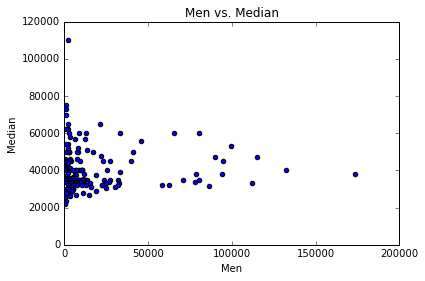

In [380]:
# 4. Between 'Men' and 'Median':
recent_grads.plot(x= 'Men', y= 'Median',
                 kind = 'scatter',
                 title = 'Men vs. Median',
                  xlim = 0,
                  ylim = 0
                 )
print("The correlation value between the attibutes are : {}".
      format(recent_grads['Men'].corr(recent_grads['Median'])))

*We again witness a very weak correlation between the given attributes.*

The correlation value between the attibutes are : -0.18284186159966848


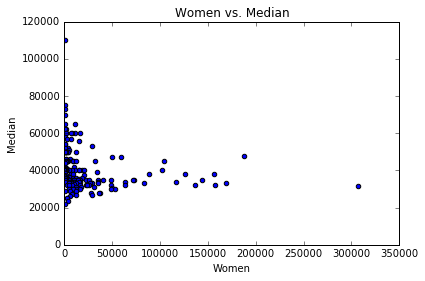

In [381]:
# 5. Between 'Women' and 'Median':
recent_grads.plot(x= 'Women', y= 'Median',
                 kind = 'scatter',
                 title = 'Women vs. Median',
                  xlim = 0,
                  ylim = 0
                 )
print("The correlation value between the attibutes are : {}".
      format(recent_grads['Women'].corr(recent_grads['Median'])))

*We see a negative correlation between the attributes.*

The correlation value between the attibutes are : 0.06295493699511233


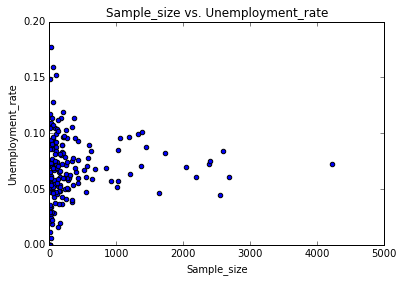

In [382]:
# 6.between 'sample_size' and 'Unemployment_rate':
recent_grads.plot(x= 'Sample_size', y= 'Unemployment_rate',
                 kind = 'scatter',
                 title = 'Sample_size vs. Unemployment_rate',
                  xlim = 0,
                  ylim = 0
                 )
print("The correlation value between the attibutes are : {}"
      .format(recent_grads['Sample_size'].corr(recent_grads['Unemployment_rate'])))

*We see a weak correlation between the attributes, similar to that between ShareWomen and Unemployment_rate.*

The correlation value between the attibutes are : -0.6186897512131612


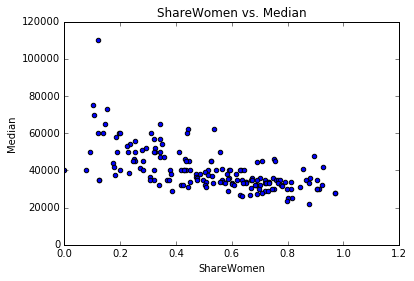

In [383]:
# 7.between 'ShareWmen' and 'Median':
recent_grads.plot(x= 'ShareWomen', y= 'Median',
                 kind = 'scatter',
                 title = 'ShareWomen vs. Median',
                  xlim = 0,
                  ylim = 0
                 )
print("The correlation value between the attibutes are : {}"
      .format(recent_grads['ShareWomen'].corr(recent_grads['Median'])))

*We see a strong neegative correlation between 'ShareWomen' and'Median' attributes showing that : ** As the the percentage share of women increases, the median salary decreases.** *

---

### 2. Using *histograms* for futher exploration of the dataset attributes:

Let's generate histograms for columns in the dataset so as to explore their distributions.

In [384]:
# Let's make a list of all the columns we need to make plot the histogram for:
cols_hist = ['Sample_size', 'Median' , 'Employed', 'Full_time', 'ShareWomen', 'Unemployment_rate',
            'Men', 'Women']

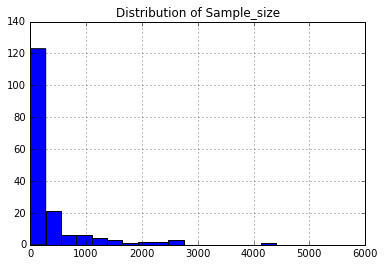

In [385]:
# Plotting the histograms using a loop:

# 1. 'Sample_size' :
recent_grads['Sample_size'].hist(bins= 20, range = (0, 5500) )
plt.title('Distribution of Sample_size')
plt.show()

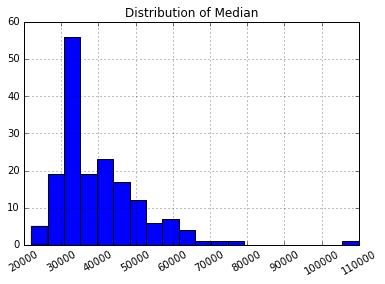

In [386]:
# 2. 'Median' :
recent_grads['Median'].hist(bins= 20, xrot= 30)
plt.title('Distribution of Median')
plt.show()

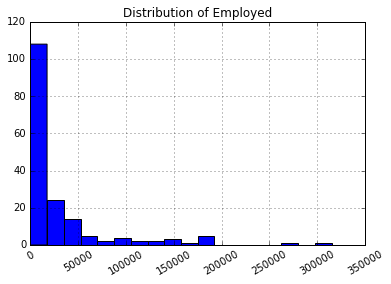

In [387]:
# 2. 'Employed' :
recent_grads['Employed'].hist(bins= 20, xrot= 30, range = (0, 350000))
plt.title('Distribution of Employed')
plt.show()

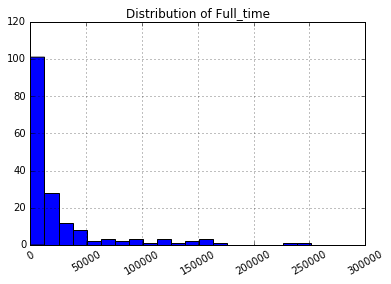

In [388]:
# 3. 'Full_time' :
recent_grads['Full_time'].hist(bins= 20, xrot= 30)
plt.title('Distribution of Full_time')
plt.show()

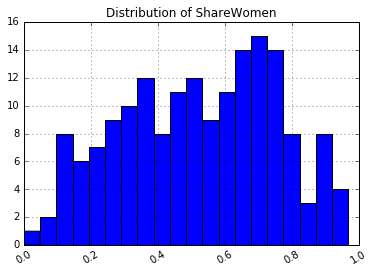

In [389]:
# 4. 'ShareWomen'
recent_grads['ShareWomen'].hist(bins= 20, xrot= 30)
plt.title('Distribution of ShareWomen')
plt.show()

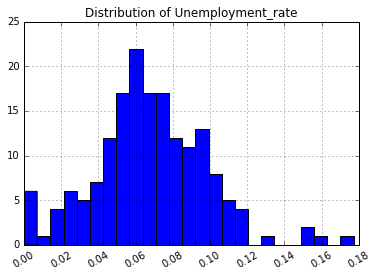

In [390]:
# 5. 'Unemployment_rate'
recent_grads['Unemployment_rate'].hist(bins= 25, xrot= 30)
plt.title('Distribution of Unemployment_rate')
plt.show()

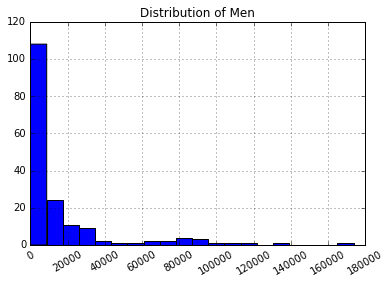

In [391]:
# 6. 'Men'
recent_grads['Men'].hist(bins= 20, xrot= 30)
plt.title('Distribution of Men')
plt.show()

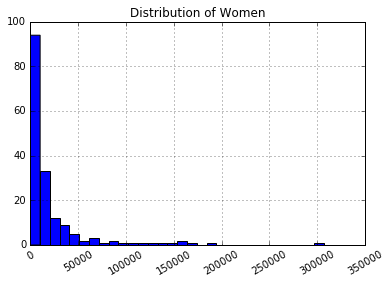

In [392]:
# 7. 'Women'
recent_grads['Women'].hist(bins= 30, xrot= 30)
plt.title('Distribution of Women')
plt.show()

---

### 3. Using *scatter-matrix* to find the correlation between dataset attributes:

 A scatter matrix plot combines both scatter plots and histograms into one grid of plots and allows us to explore potential relationships and distributions simultaneously. A scatter matrix plot consists of `n` by `n` plots on a grid, where n is the number of columns, the plots on the diagonal are histograms, and the non-diagonal plots are scatter plots.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4b8e4a3208>,
      dtype=object)

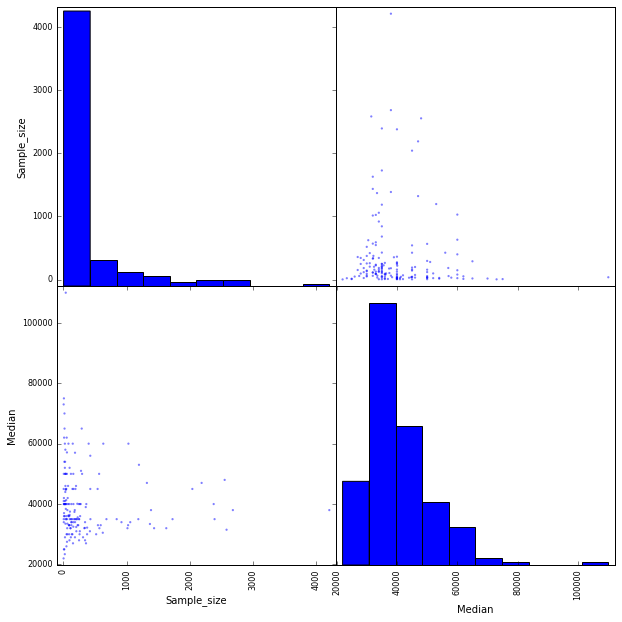

In [393]:
# 1. plotting 'Sample_size' and'Median' using scatter_matrix plots:
pd.plotting.scatter_matrix(recent_grads[['Sample_size', 'Median']], figsize=(10,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4b8e2e9080>,
      dtype=object)

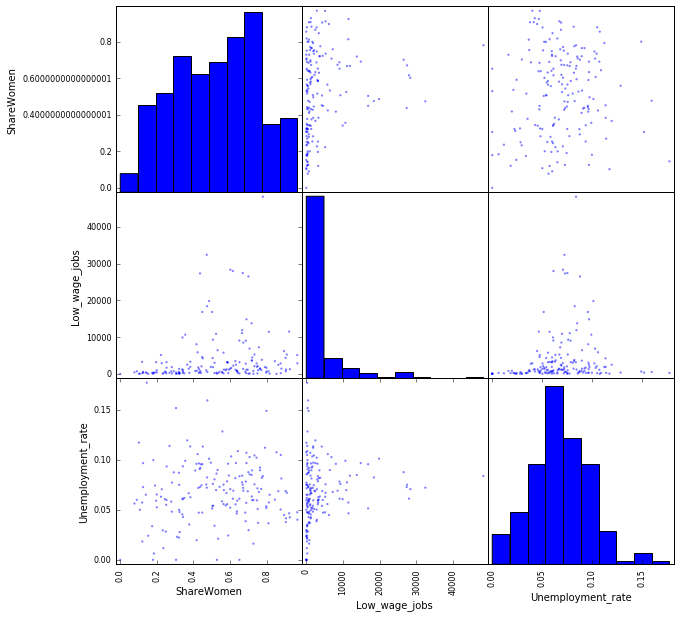

In [394]:
# 2.Let's plot a scatter matrix plot between sharewmen and low wage jobs:
pd.plotting.scatter_matrix(recent_grads[['ShareWomen', 'Low_wage_jobs', 'Unemployment_rate']], figsize= (10, 10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4b8fa5ada0>,
      dtype=object)

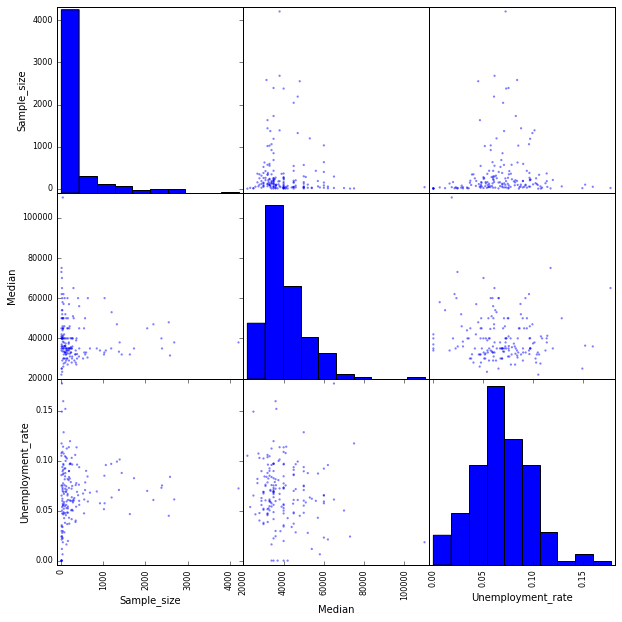

In [395]:
# 3. creating a 3*3 scatter matrix plot:
pd.plotting.scatter_matrix(recent_grads[['Sample_size', 'Median', 'Unemployment_rate']], figsize= (10, 10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4b8f186358>,
      dtype=object)

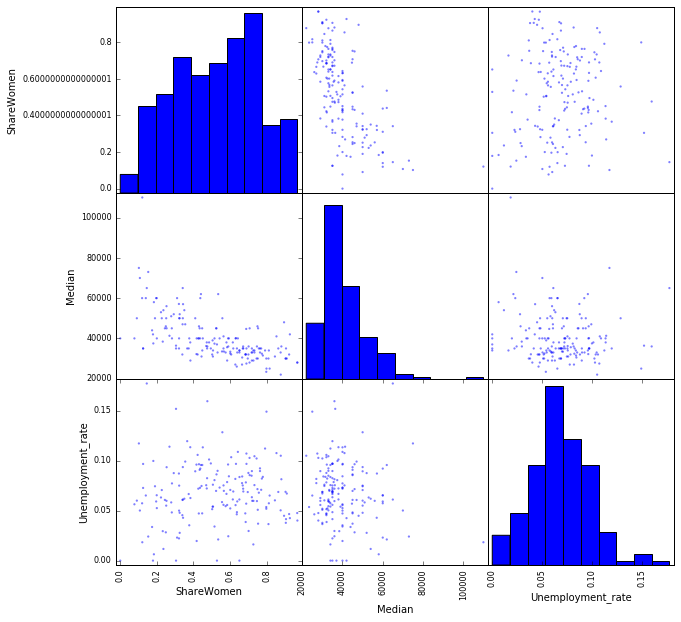

In [396]:
 # 4. creating a 3*3 scatter matrix plot:
pd.plotting.scatter_matrix(recent_grads[['ShareWomen', 'Median', 'Unemployment_rate']], figsize= (10, 10))

The correlation value between the attributes are:
             ShareWomen  Employed
ShareWomen    1.000000  0.147547
Employed      0.147547  1.000000


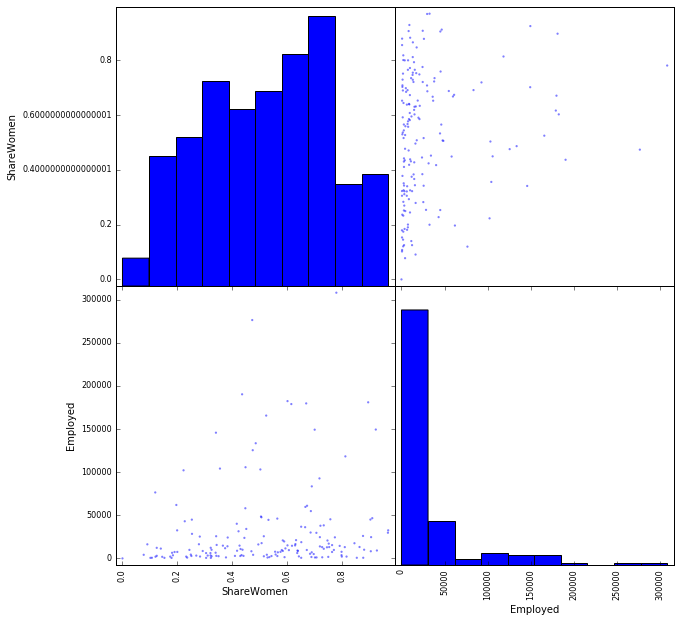

In [397]:
# a scatter matrix between 'ShareWomen' and'Employed':
pd.plotting.scatter_matrix(recent_grads[['ShareWomen', 'Employed']], figsize = (10, 10))
print ('The correlation value between the attributes are:\n {}' .format(recent_grads[['ShareWomen', 'Employed']].corr()))

---

### 4. Using *bar plots* to find the correlation between dataset attributes:

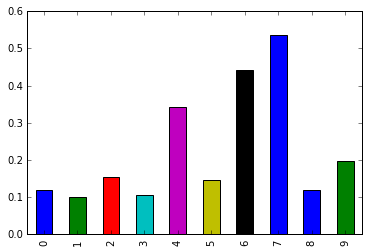

The mean value of columns :0.226244326


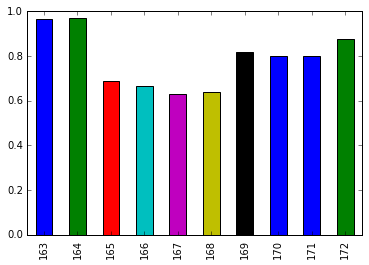

The mean value of columns :0.7853643873999999


In [398]:
# Comparing the percentages of women in the first 10 and last 10 rows of our dataset:
recent_grads[:10]['ShareWomen'].plot(kind= 'bar')
plt.show()
print('The mean value of columns :{}' .format(recent_grads[:10]['ShareWomen'].mean()))
recent_grads[-10:]['ShareWomen'].plot(kind='bar')
plt.show()
print('The mean value of columns :{}' .format(recent_grads[-10:]['ShareWomen'].mean()))

*We see that the **percentage of women increases** as we move down the rows of the dataset.*

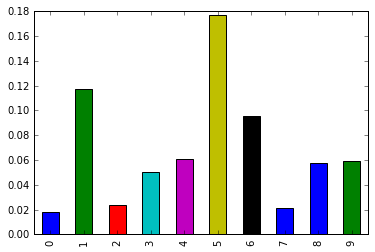

The mean value of columns :0.06815034360000001


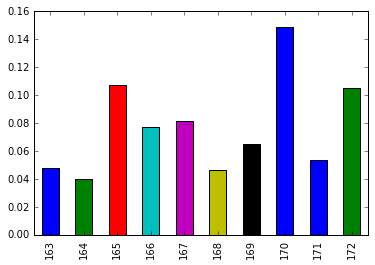

The mean value of columns :0.0773135073


In [399]:
# Comparing the unemployment rate in the first 10 and last 10 rows of our dataset:
recent_grads[:10]['Unemployment_rate'].plot(kind= 'bar')
plt.show()
print('The mean value of columns :{}' .format(recent_grads[:10]['Unemployment_rate'].mean()))
recent_grads[-10:]['Unemployment_rate'].plot(kind='bar')
plt.show()
print('The mean value of columns :{}' .format(recent_grads[-10:]['Unemployment_rate'].mean()))

*We see that the **unemployment rate also increases** as we move down the rows of the dataset.*

---

Using the plots and values from above let's finally answer the questions that we sought to draw from the dataset:
1. *Do students in more popular majors make more money?* :
Using the scatter plots, we see that for small `sample_size` the range of median salary was higher, indicating that ***students in less popular majors make more money.***<br>

2. *Do students that majored in subjects that were majority female make more money?* :
Using the women vs median scatter plot we find **subjects that had more females provide a lesser median salary.**

3. *Is there any link between the number of full-time employees and median salary?*:
From the scatter plot we found that **lesser the number of full-time employees, higher is the range of the salary.**


Let's if we can verify our findings numerically:

In [400]:
# Let's find the mean of the median salaries of the 10 most popular and 10 least popular majors:
top_tot = recent_grads['Total'].sort_values(ascending = False).head(10).values
med = 0;
for val in top_tot:
    row = recent_grads[recent_grads['Total'] == val]
    total_pop = row['Median']
    med = med + int(total_pop)

print ('The mean of median salaries of the top 10 most popular majors is: {}'
       .format(med/len(top_tot)))



low_tot = recent_grads['Total'].sort_values(ascending = False).tail(10).values
med = 0;
for val in low_tot:
    row = recent_grads[recent_grads['Total'] == val]
    total_pop = row['Median']
    med = med + int(total_pop)

print ('The mean of median salaries of the 10 least popular majors is: {}'
       .format(med/len(low_tot)))


The mean of median salaries of the top 10 most popular majors is: 37890.0
The mean of median salaries of the 10 least popular majors is: 46600.0


Hence can conclusively prove that students from the lesser popular majors earn more than that of the popular ones.

In [401]:
# Let's find all the majors more populated with women and find the mean of their median salaries:
recent_grads[recent_grads['ShareWomen'] > 0.5]['Median'].mean()

34605.208333333336

In [402]:
# Let's compare our findings to the majors populated with men:
recent_grads[recent_grads['ShareWomen'] < 0.5]['Median'].mean()

46988.15789473684

We therefore see that majors that had more women, provided a lesser median salary on average.

In [403]:
# Let's find the mean of the median salaries of the 10 majors with most full_time employees to the least ones: 
top_tot = recent_grads['Full_time'].sort_values(ascending = False).head(10).values
med = 0;
for val in top_tot:
    row = recent_grads[recent_grads['Full_time'] == val]
    total_pop = row['Median']
    med = med + int(total_pop)

print ('The mean of median salaries of the majors with most full time emloyees: {}'
       .format(med/len(top_tot)))



low_tot = recent_grads['Full_time'].sort_values(ascending = False).tail(10).values
med = 0;
for val in low_tot:
    row = recent_grads[recent_grads['Full_time'] == val]
    total_pop = row['Median']
    med = med + int(total_pop)

print ('The mean of median salaries of the 10 majors with least full time employees: {}'
       .format(med/len(low_tot)))


The mean of median salaries of the majors with most full time emloyees: 38790.0
The mean of median salaries of the 10 majors with least full time employees: 45700.0


Hence we see that lesser the number of full_time employees, more the median salary on average.

## Additional Exploration:

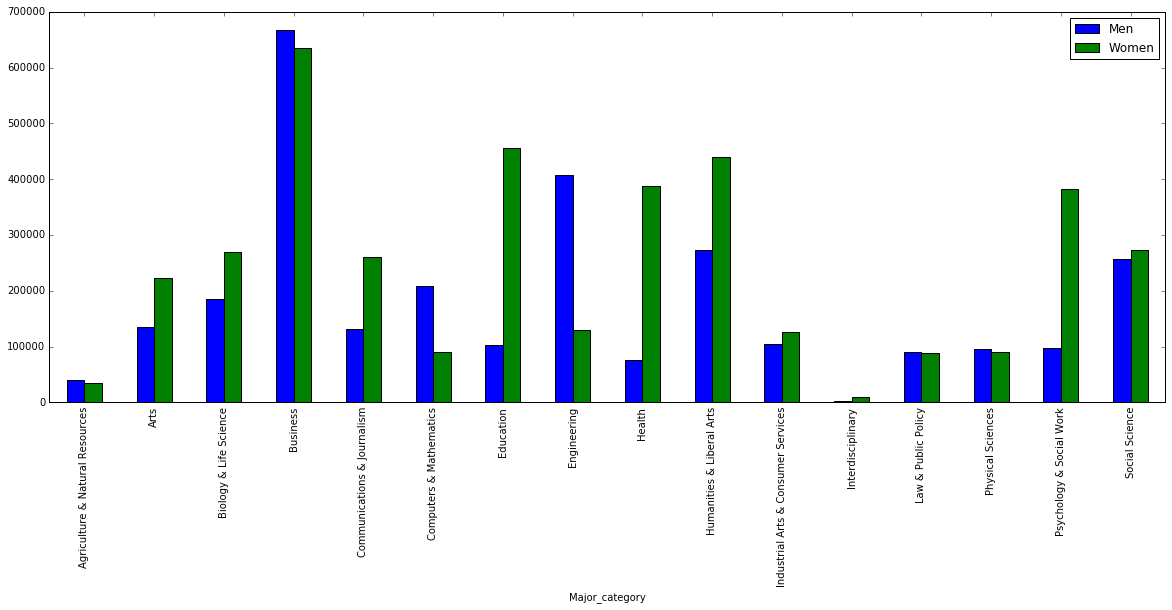

In [404]:
# grouped bar plot to compare the number of men with the number of women in each category of majors.
recent_grads.groupby('Major_category')['Men', 'Women'].agg('sum').plot.bar(figsize=(20, 7))

Observations :
- Most popular major category : `Business`
- Male dominated majors: `Engineering`,`Computers and Mathematics`
- Female dominated majors : `Arts`, `Biology & Life Sciences`, `Communications and Journalism`, `Education`, `Health`, `Humanities and Liberal Arts`, `Psychology and Social Work.`
- Equally populated majors : `Agriculture & Natural Resources`, `Business`, `Industrial Arts & Consumer Services`, `Law & Public Policy`, `Physical Sciences`, `Physical Sciences` and `Social Science`
- Least popular major category : `Interdisciplinary` (:combination of categories), otherwise : `Communications & Journalism`

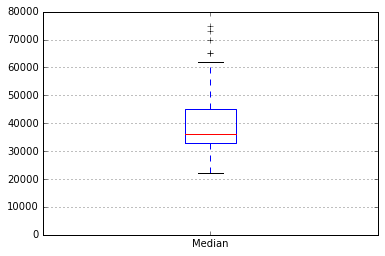

In [405]:
#  box plot to explore the distributions of median salaries and unemployment rate:
recent_grads['Median'].plot(kind='box', ylim=(0,80000)).grid(axis='y')
plt.show()

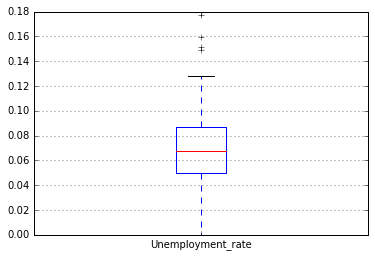

In [406]:
recent_grads['Unemployment_rate'].plot(kind='box').grid(axis='y')

Observations :
- Least median salary is in the lower 20's range.
- 50% of the salaries are between 30K-45K.
- 50% of the unemployment range is between 0.05-0.09 (i.e 5% - 9% of the total students enrolled in the majors.)
- 75% of the majors have unemployment rate below 9 percent

In [407]:
# Let's see if we can numerically verify our findings:
recent_grads[['Median', 'Unemployment_rate']].describe()

,Median,Unemployment_rate
count,172.000000,172.000000
mean,40076.744186,0.068024
std,11461.388773,0.030340
min,22000.000000,0.000000
25%,33000.000000,0.050261
50%,36000.000000,0.067544
75%,45000.000000,0.087247
max,110000.000000,0.177226


---

## Conclusion:
1. On average, less popular majors provide higher salaries.
2. On average, the umemployment rate is 6.8%. 
3. Men have higher salaries than women, indicating a high income disparity.
4. Branches like `Engineering` are still male dominant, whereas those like `Health` and `Education` are female dominant.


---